<a href="https://colab.research.google.com/github/wp225/task/blob/main/rectangle_numbering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow

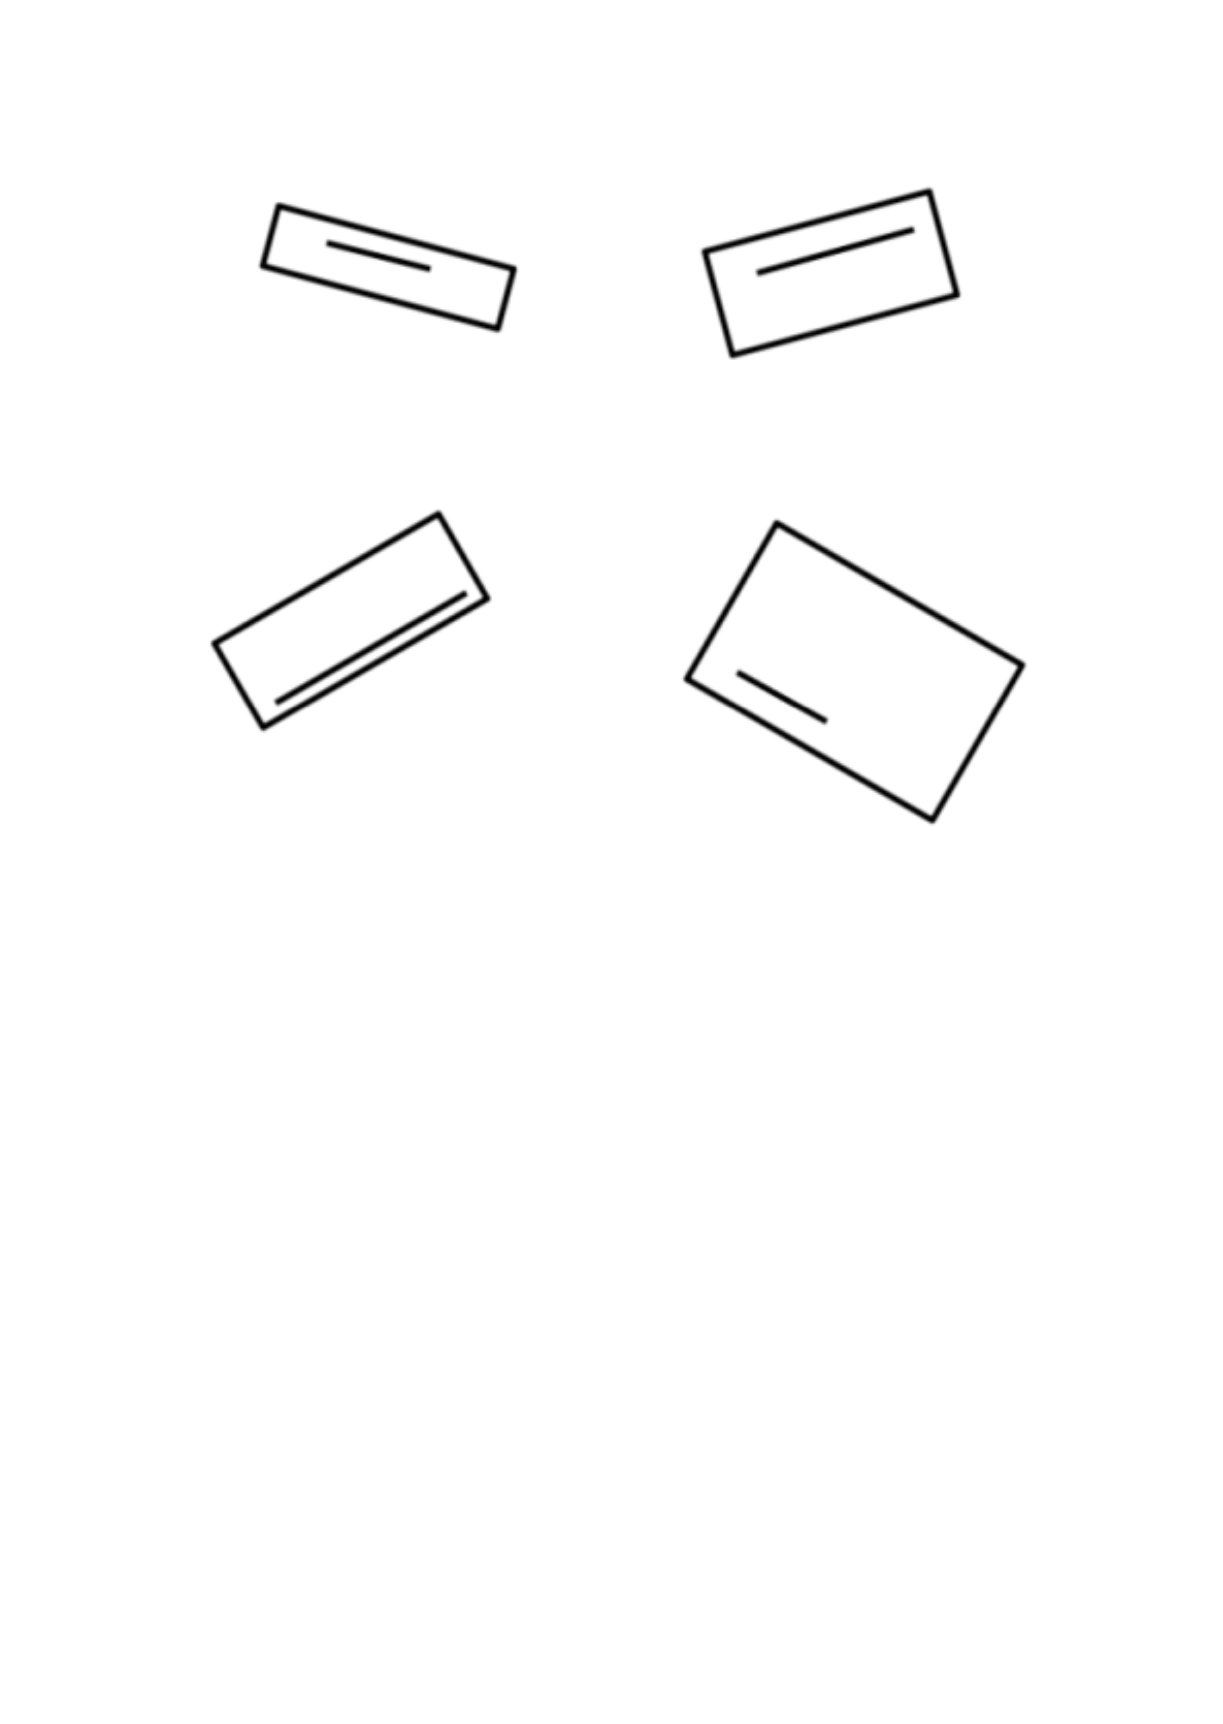

In [ ]:
image=cv2.imread('/content/task.png')
cv2_imshow(image)

In [ ]:

imgray = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)[...,0]
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(imgray, kernel, iterations=1)
#im_show(img_erosion)
ret, thresh = cv2.threshold(img_erosion, 20, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
mask = 255 - thresh
contours, hierarchy = cv2.findContours(mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
cont_copy=tuple(contours)

In [ ]:
length=[]
parent=[]
child=[]
for i in range(np.shape(contours)[0]):
    opened = hierarchy[0][i][2]<0 and hierarchy[0][i][3]<0
    if opened == True:
      l= cv2.arcLength(contours[i],False)
      #print(l)
      #cv2.drawContours(image, contours, i, (0,255,0))
      length.append(l)
      child.append(i)
    else:
      closed=hierarchy[0][i][3]>1
      if closed==True:
       parent.append(i)
len_=sorted(length)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
for i in range(len(length)):
 cnt = contours[parent[i]]
 x, y, w, h = cv2.boundingRect(cnt)
 p=len_.index(length[i])
 #cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
 cv2.putText(image, str(p+1), (x, y+h+20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

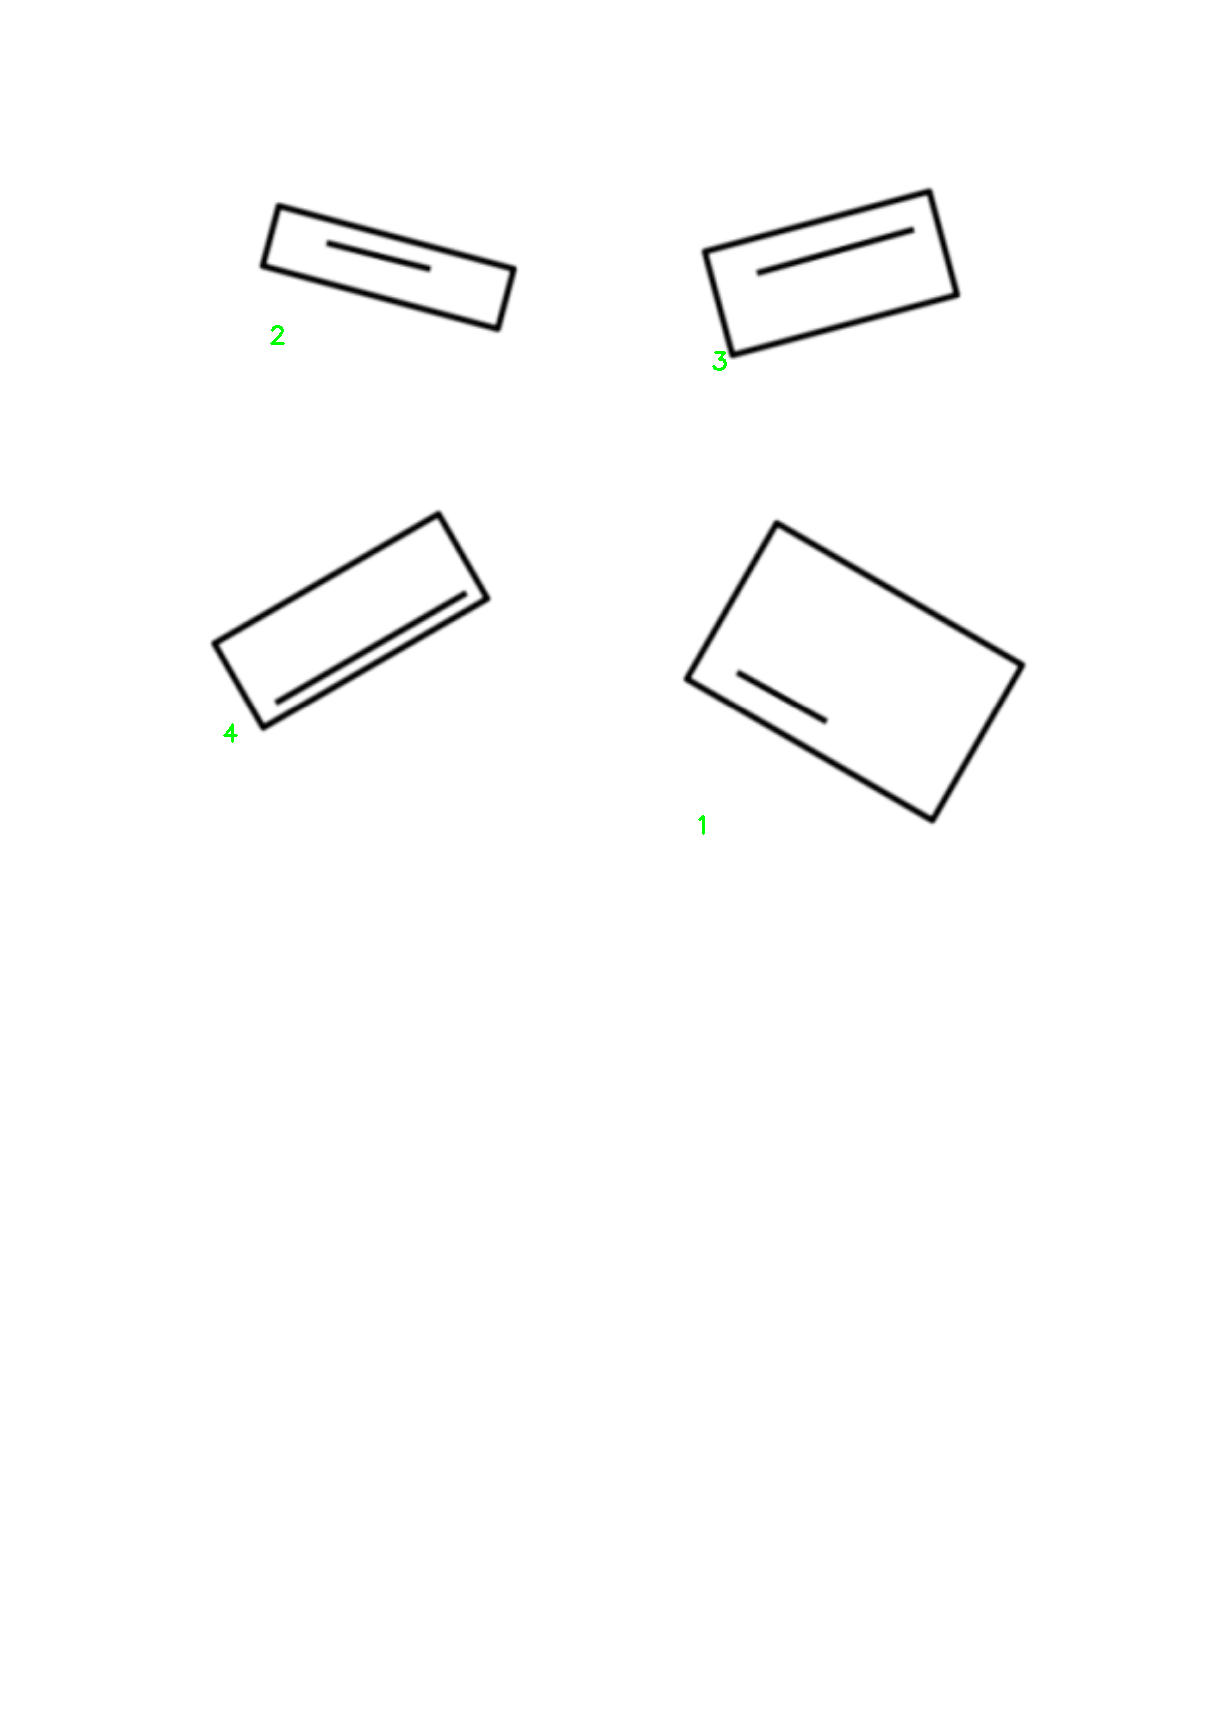

In [ ]:
cv2_imshow(image)